<a href="https://colab.research.google.com/github/brugalbryan/Artificial-Intelligence/blob/main/Building%20regression%20%26%20classification%20model%20without%20sklearn%20part%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Project

*   List item
*   List item



In this project, you will build a regression model and a classification model from scratch. Please follow the instructions closely, and only use Python's Numpy, Pandas, and matplotlib library to complete this project. Using functions from `sklearn` is not allowed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part II: A Classification Model

In this part, we will build a logistic regression model and evaluate its performance on the classifying the data. The dataset is as follows:


In [ ]:
data2 = pd.DataFrame([[5.0, 2.0, 1],
                      [6.2, 3.4, 1],
                      [4.9, 3.6, 0],
                      [6.2, 2.2, 1],
                      [5.7, 3.0, 1],
                      [4.8, 3.4, 0],
                      [5.0, 3.4, 0]],
                     columns=["x1", "x2", "class"])
data2

,x1,x2,class
0,5.0,2.0,1
1,6.2,3.4,1
2,4.9,3.6,0
3,6.2,2.2,1
4,5.7,3.0,1
5,4.8,3.4,0
6,5.0,3.4,0


### Task 1: Data Visualization (10 pts)
Visualize the data as a scatter plot. Show class 0 records as green dots and class 1 records as blue dots. Display the following items:
- Title of the plot: Distribution of the training data
- Label for x axis: x1
- Label for y axis: x2
- Legend

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


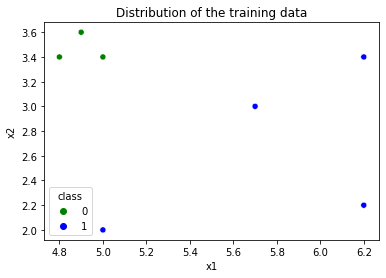

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = {0:'green',1:'blue'}
plt.title('Distribution of the training data')
sns.scatterplot("x1","x2",hue="class",data = data2,palette=colors)


### Task 2: Apply A Logistic Regression Model (10 pts)

Suppose that you are given a logistic regression model with explicity paramter values:

$p = \sigma(\textbf{x}\cdot\theta^T).$

where
- p: the probability that the point belongs to class 1.
- $\textbf{x} = (1, x_1, x_2)$.
- $\theta = (\theta_0, \theta_1, \theta_2) = (-2.15, 0.92, -0.82)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$

Find the model's prediction on the following test set:

In [ ]:
data3 = pd.DataFrame([[5.1, 3.4, 0],
                      [6.5, 2.8, 1],
                      [5.8, 2.7, 1],
                      [4.6, 3.1, 0]],
                     columns=["x1", "x2", "class"])
data3

,x1,x2,class
0,5.1,3.4,0
1,6.5,2.8,1
2,5.8,2.7,1
3,4.6,3.1,0


In [ ]:
array1 = list(data3['x1'])
array2 = list(data3['x2'])
actual = list(data3['class'])


theta = [-2.15, 0.92, -0.82]

test_pred = []
df_prediction = []

for i in range(len(array1)):
    t = theta[0] + theta[1]*array1[i] +theta[2]*array2[i]
    
    y = 1/(1+np.e**(-t))
    df_prediction.append(y)
    if (y>0.5):
        test_pred.append(1)
    else:
        test_pred.append(0)


data3["Is_Virginica"] = test_pred
print("model's prediction on the following test set:")  
data3.head()

model's prediction on the following test set:


,x1,x2,class,Is_Virginica
0,5.1,3.4,0,0
1,6.5,2.8,1,1
2,5.8,2.7,1,1
3,4.6,3.1,0,0


### Task 3: Model Evaluation (40 pts)
Calculate the following model metrics regarding the performance on the test set:
- classification accuracy
- precision score
- recall score
- F-1 score

In [ ]:
# Classification Accuracy
num_true_negatives = 0
num_true_positives = 0
num_false_positives = 0
num_false_negatives = 0

# num_true_positives / (num_true_positives + num_false_positives

for i in range(len(test_pred)):
    if(actual[i]==0):
        if(test_pred[i] == 0):
            num_true_negatives = num_true_negatives + 1
        else:
            num_false_negatives = num_false_negatives + 1
    else:
        if(test_pred[i] == 1):
            num_true_positives = num_true_positives + 1
        else:
            num_false_positives = num_false_positives + 1

accuracyScore = ((num_true_positives + num_true_negatives) /  \
                 (num_true_positives + num_true_negatives + num_false_positives + num_false_negatives))
print('Classification Accuracy: ',accuracyScore)


Classification Accuracy:  1.0


In [ ]:
# Precision Score
precisionScore = (num_true_positives / (num_true_positives + num_false_positives))
print('Precision Score: ',precisionScore)

Precision Score:  1.0


In [ ]:
# Recall Score
recallScore = (num_true_positives/(num_true_positives + num_false_negatives))
print('Recall Score: ',recallScore)


Recall Score:  1.0


In [ ]:
# F-1 Score
# F1 Score is the 2*((precision*recall)/(precision+recall))
f1 = ((2* precisionScore * recallScore)/(precisionScore + recallScore))
print('F-1 Score: ',f1)


F-1 Score:  1.0
